# Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from IPython.display import display
import shutil

In [2]:
current_directory = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
csv_path = os.path.join(parent_directory, "data/COMPUTER_VISION/pokemon.csv")
df = pd.read_csv(csv_path)

In [3]:
images_directory = os.path.join(parent_directory, "data/COMPUTER_VISION/images/")

# Exploration

In [4]:
df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [5]:
images_directory

'/home/morgane/code/mtthibault/catchemall/data/COMPUTER_VISION/images/'

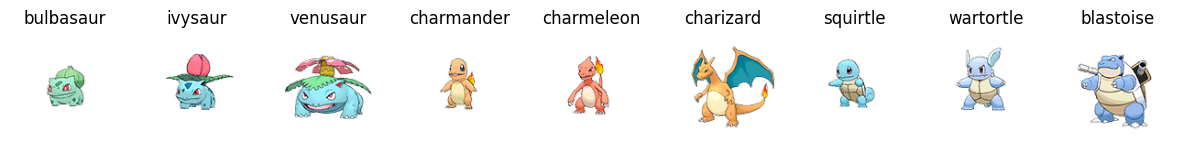

In [6]:
fig, axes = plt.subplots(1, 9, figsize=(15, 5))

for i, nom_pokemon in enumerate(df['Name'].head(9)):
    chemin_image_png = images_directory + nom_pokemon.lower() + ".png"
    chemin_image_jpg = images_directory + nom_pokemon.lower() + ".jpg"
    
    if os.path.exists(chemin_image_png):
        chemin_image = chemin_image_png
    elif os.path.exists(chemin_image_jpg):
        chemin_image = chemin_image_jpg
    else:
        print(f"Aucun fichier trouvé pour {nom_pokemon}")
        continue
    
    img = Image.open(chemin_image)
    
    axes[i].imshow(img)
    axes[i].set_title(nom_pokemon)
    axes[i].axis('off')

plt.show()

# Création dossiers par type de Pokémon

In [7]:
types = set(df['Type1'])
types

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

In [8]:
parent_directory

'/home/morgane/code/mtthibault/catchemall'

In [9]:
types_directory = os.path.join(parent_directory, "data/COMPUTER_VISION/types/")
types_directory

'/home/morgane/code/mtthibault/catchemall/data/COMPUTER_VISION/types/'

In [17]:
for pokemon_type in types:
    type_directory_path = os.path.join(types_directory, pokemon_type)
    # Pour vérifier si dossier existe déjà, sinon créer
    if not os.path.exists(type_directory_path):
        os.makedirs(type_directory_path)

# Rangement des pokémons par dossier Type

In [18]:
for index, row in df.iterrows():
    pokemon_name = row['Name']
    type1 = row['Type1']
    type2 = str(row['Type2'])  # str pcq sinon ça bug à cause des NaN

    type1_directory_path = os.path.join(types_directory, type1)
    if os.path.exists(type1_directory_path):
        for ext in ['jpg', 'png']:
            source_image_path = os.path.join(images_directory, f'{pokemon_name}.{ext}')
            if os.path.exists(source_image_path):
                destination_path = os.path.join(type1_directory_path, f'{pokemon_name}.{ext}')
                shutil.copy(source_image_path, destination_path)
                break 

    # Vérifier si le type 2 existe et copier l'image
    if type2:
        type2_directory_path = os.path.join(types_directory, type2)
        if os.path.exists(type2_directory_path):
            for ext in ['jpg', 'png']:
                source_image_path = os.path.join(images_directory, f'{pokemon_name}.{ext}')
                if os.path.exists(source_image_path):
                    destination_path = os.path.join(type2_directory_path, f'{pokemon_name}.{ext}')
                    shutil.copy(source_image_path, destination_path)
                    break 